## ALunos externos: 
### Alfredo Alexandre de Oliveira
### Ricardo da Silva Zanata

### Instalando as bibliotecas

In [2]:
!pip install pydriller
!pip install community
!pip install numpy
!pip install matplotlib
!pip install networkx
!pip install python-louvain
!pip install git
!pip install pandas


ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git


### Importando as bibliotecas para o projeto final

In [3]:
import pandas as pd
from datetime import datetime
import numpy as np
from pydriller import Repository, Git
from tqdm import tqdm
from git import Repo
import matplotlib.pyplot as plt
import seaborn as sns

### Coleta de dados do GitHub com PyDriller Repositótio Node (GITHUB)

Para este projeto, escolhemos um repositório no GitHub com muitas colaborações para coletar dados de commits usando a biblioteca PyDriller. O PyDriller é uma biblioteca Python que facilita a mineração de repositórios Git, permitindo a extração de informações detalhadas sobre commits, desenvolvedores, modificações em arquivos, entre outros. É uma ferramenta particularmente útil para análises de software e pesquisas em engenharia de software, pois permite aos usuários analisar o histórico de desenvolvimento de projetos de software de maneira eficiente.

### Referência
Saiba mais em: https://pydriller.readthedocs.io/en/latest/index.html

In [6]:
print("Atenção: Você deve fazer backup dos dois arquivos principais após a execução antes que o Colab encerre a seção!")
print("Isso pode demorar um pouco. Tome cuidado para não tentar coletar repositórios gigantes cobrindo um longo período!")

# Configurações iniciais
url_repo = 'https://github.com/nodejs/node'
since_date = datetime(2024, 1, 1)  # Ajustável conforme necessário
to_date = datetime(2024, 3, 15)   # Ajustável conforme necessário
file_name = "trabalhofinal"

# URL do repositório remoto
# Caminho local onde o repositório será clonado
# Crie uma pasta chamada tmp
url_repo_local = 'd:/tmp/'

# Clonando o repositório
Repo.clone_from(url_repo, url_repo_local)

print(f'Repositório clonado em: {url_repo_local}')

# Inicializando o objeto Git para o repositório
gr = Git(url_repo_local)

# Contagem de commits no intervalo de datas
total_commits = sum(1 for _ in Repository(path_to_repo=url_repo_local, since=since_date, to=to_date).traverse_commits())

print(f'Total de commits no intervalo: {total_commits}')

# Listas para armazenar os dados dos commits e dos arquivos modificados
data_commits = []
data_modified_files = []

print("Extraindo os dados dos commits:")
# Extrair dados dos commits - TQDM irá te dar uma noção de tempo. 
for commit in tqdm(Repository(path_to_repo=url_repo, since=since_date, to=to_date).traverse_commits(), total=total_commits):
    # Dados do commit
    commit_data = {
        'hash': commit.hash,  # Identificador único do commit
        'msg': commit.msg,  # Mensagem do commit
        'author_name': commit.author.name,  # Nome do autor do commit
        'author_email': commit.author.email,  # Email do autor do commit
        'committer_name': commit.committer.name,  # Nome do responsável pelo commit
        'committer_email': commit.committer.email,  # Email do responsável pelo commit
        'author_date': commit.author_date,  # Data do commit pelo autor
        'author_timezone': commit.author_timezone,  # Fuso horário do autor
        'committer_date': commit.committer_date,  # Data do commit pelo responsável
        'committer_timezone': commit.committer_timezone,  # Fuso horário do responsável
        'branches': commit.branches,  # Ramos que contêm o commit
        'in_main_branch': commit.in_main_branch,  # Se o commit está no ramo principal
        'merge': commit.merge,  # Se o commit é um merge
        'parents': commit.parents,  # Identificadores dos commits pais
        'project_name': commit.project_name,  # Nome do projeto
        'project_path': commit.project_path,  # Caminho do projeto no sistema de arquivos
        'deletions': commit.deletions,  # Número de linhas deletadas
        'insertions': commit.insertions,  # Número de linhas inseridas
        'lines': commit.lines,  # Número total de linhas modificadas
        'files': len(commit.modified_files),  # Número de arquivos modificados
        'dmm_unit_size': commit.dmm_unit_size,  # Métrica de manutenibilidade relacionada ao tamanho do módulo
        'dmm_unit_complexity': commit.dmm_unit_complexity,  # Métrica de manutenibilidade relacionada à complexidade do módulo
        'dmm_unit_interfacing': commit.dmm_unit_interfacing,  # Métrica de manutenibilidade relacionada à interfacing do módulo
    }
    data_commits.append(commit_data)

    # Processar arquivos modificados para cada commit
    for modified_file in commit.modified_files:
        modified_file_data = {
            'commit_hash': commit.hash,  # Hash do commit. Este é um identificador único para cada commit.
            'file_path': modified_file.new_path or modified_file.old_path,  # Caminho do arquivo modificado. `new_path` é usado se o arquivo foi adicionado ou modificado, e `old_path` é usado se o arquivo foi renomeado ou deletado.
            'change_type': modified_file.change_type.name,  # Tipo de modificação feita no arquivo. Pode ser ADD (adicionado), MODIFY (modificado), DELETE (deletado), entre outros.
            'insertions': modified_file.added_lines,  # Número de linhas inseridas no arquivo neste commit.
            'deletions': modified_file.deleted_lines,  # Número de linhas deletadas do arquivo neste commit.
            'lines': modified_file.added_lines + modified_file.deleted_lines,  # Total de linhas alteradas (soma das inserções e deleções).
            'nloc': modified_file.nloc,  # Número de linhas de código no arquivo após a modificação. `nloc` significa "Non-Comment Lines Of Code", ou seja, linhas de código sem contar comentários.
            'complexity': modified_file.complexity,  # Complexidade ciclomática do arquivo após a modificação. É uma medida de quão complexo é o código, baseada na quantidade de caminhos de execução possíveis.
            'token_count': modified_file.token_count  # Número de tokens (elementos básicos como palavras-chave, identificadores, literais, etc.) no arquivo modificado.
        }
        data_modified_files.append(modified_file_data)


# Converter para DataFrames
df_commits = pd.DataFrame(data_commits)
df_modified_files = pd.DataFrame(data_modified_files)

#Salvando os dados de commits e Arquivos modificados
df_commits.to_csv(file_name+"-commits.csv", index=False)
df_modified_files.to_csv(file_name+"-modified-files.csv", index=False)
print("Coleta Finalizada! Salve os arquivos commits.csv e modified-files.csv para não ter que recoletar.")

Atenção: Você deve fazer backup dos dois arquivos principais após a execução antes que o Colab encerre a seção!
Isso pode demorar um pouco. Tome cuidado para não tentar coletar repositórios gigantes cobrindo um longo período!
Repositório clonado em: d:/tmp/
Total de commits no intervalo: 340
Extraindo os dados dos commits:


100%|██████████| 340/340 [10:25<00:00,  1.84s/it] 

Coleta Finalizada! Salve os arquivos commits.csv e modified-files.csv para não ter que recoletar.


### Vamos começar com a leitura do arquivo e a visualização das primeiras linhas dos dados.

In [4]:
# Leitura do arquivo CSV
file_path = 'trabalhofinal-commits.csv'
data = pd.read_csv(file_path)

# Visualização das primeiras linhas dos dados
data.head()

,hash,msg,author_name,author_email,committer_name,committer_email,author_date,author_timezone,committer_date,committer_timezone,...,parents,project_name,project_path,deletions,insertions,lines,files,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
0,d85c3e859b48263ed0a49a719264dc39da275a49,deps: update acorn to 8.11.3\n\nPR-URL: https:...,Node.js GitHub Bot,github-bot@iojs.org,GitHub,noreply@github.com,2024-01-02 02:47:20+02:00,-7200,2024-01-02 00:47:20+00:00,0,...,['5fb630597196cd5f3a8b7febdea3108fb89f067b'],node,C:\Users\Rick's\AppData\Local\Temp\tmp0rf_ap25...,18,30,48,5,1.0,0.0,1.0
1,072af88dc84824cd5e4de4c64a03af7cff7575de,deps: update corepack to 0.24.0\n\nPR-URL: htt...,Node.js GitHub Bot,github-bot@iojs.org,GitHub,noreply@github.com,2024-01-02 02:47:30+02:00,-7200,2024-01-02 00:47:30+00:00,0,...,['d85c3e859b48263ed0a49a719264dc39da275a49'],node,C:\Users\Rick's\AppData\Local\Temp\tmp0rf_ap25...,85,118,203,4,NaN,NaN,NaN
2,477d6d7cd599664c15de647e7b29f721f8c84ff7,tools: update lint-md-dependencies to rollup@4...,Node.js GitHub Bot,github-bot@iojs.org,GitHub,noreply@github.com,2024-01-02 02:47:40+02:00,-7200,2024-01-02 00:47:40+00:00,0,...,['072af88dc84824cd5e4de4c64a03af7cff7575de'],node,C:\Users\Rick's\AppData\Local\Temp\tmp0rf_ap25...,60,60,120,2,NaN,NaN,NaN
3,508490f79d5d662a432553e5b6c2df8dc9343235,meta: move one or more collaborators to emerit...,Node.js GitHub Bot,github-bot@iojs.org,GitHub,noreply@github.com,2024-01-03 06:15:44+02:00,-7200,2024-01-03 04:15:44+00:00,0,...,['477d6d7cd599664c15de647e7b29f721f8c84ff7'],node,C:\Users\Rick's\AppData\Local\Temp\tmp0rf_ap25...,2,2,4,1,NaN,NaN,NaN
4,088f4ccf623af8ed58a09ed01485f96d84c7f51e,src: avoid shadowed string in fs_permission\n\...,Shelley Vohr,shelley.vohr@gmail.com,GitHub,noreply@github.com,2024-01-03 14:28:26+01:00,-3600,2024-01-03 13:28:26+00:00,0,...,['508490f79d5d662a432553e5b6c2df8dc9343235'],node,C:\Users\Rick's\AppData\Local\Temp\tmp0rf_ap25...,8,10,18,1,0.0,0.0,1.0


### Tratamento de Erros e Inconsistências
Vamos começar identificando e tratando valores nulos.

In [5]:
# Verificando valores nulos
print(data.isnull().sum())

# Tratamento de valores nulos (exemplo: preenchendo com zero)
data.fillna(0, inplace=True)

hash                      0
msg                       0
author_name               0
author_email              0
committer_name            0
committer_email           0
author_date               0
author_timezone           0
committer_date            0
committer_timezone        0
branches                  0
in_main_branch            0
merge                     0
parents                   0
project_name              0
project_path              0
deletions                 0
insertions                0
lines                     0
files                     0
dmm_unit_size           180
dmm_unit_complexity     180
dmm_unit_interfacing    181
dtype: int64


### Transformações e Limpeza dos Dados
Podemos fazer algumas transformações, como converter datas para datetime e extrair informações úteis.

In [6]:
# Convertendo datas para datetime
data['author_date'] = pd.to_datetime(data['author_date'], errors='coerce', utc=True)
data['committer_date'] = pd.to_datetime(data['committer_date'], errors='coerce', utc=True)

# Extraindo informações úteis
data['author_year'] = data['author_date'].dt.year
data['author_month'] = data['author_date'].dt.month
data['author_day'] = data['author_date'].dt.day

# Visualizando as transformações
data.head()

,hash,msg,author_name,author_email,committer_name,committer_email,author_date,author_timezone,committer_date,committer_timezone,...,deletions,insertions,lines,files,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing,author_year,author_month,author_day
0,d85c3e859b48263ed0a49a719264dc39da275a49,deps: update acorn to 8.11.3\n\nPR-URL: https:...,Node.js GitHub Bot,github-bot@iojs.org,GitHub,noreply@github.com,2024-01-02 00:47:20+00:00,-7200,2024-01-02 00:47:20+00:00,0,...,18,30,48,5,1.0,0.0,1.0,2024,1,2
1,072af88dc84824cd5e4de4c64a03af7cff7575de,deps: update corepack to 0.24.0\n\nPR-URL: htt...,Node.js GitHub Bot,github-bot@iojs.org,GitHub,noreply@github.com,2024-01-02 00:47:30+00:00,-7200,2024-01-02 00:47:30+00:00,0,...,85,118,203,4,0.0,0.0,0.0,2024,1,2
2,477d6d7cd599664c15de647e7b29f721f8c84ff7,tools: update lint-md-dependencies to rollup@4...,Node.js GitHub Bot,github-bot@iojs.org,GitHub,noreply@github.com,2024-01-02 00:47:40+00:00,-7200,2024-01-02 00:47:40+00:00,0,...,60,60,120,2,0.0,0.0,0.0,2024,1,2
3,508490f79d5d662a432553e5b6c2df8dc9343235,meta: move one or more collaborators to emerit...,Node.js GitHub Bot,github-bot@iojs.org,GitHub,noreply@github.com,2024-01-03 04:15:44+00:00,-7200,2024-01-03 04:15:44+00:00,0,...,2,2,4,1,0.0,0.0,0.0,2024,1,3
4,088f4ccf623af8ed58a09ed01485f96d84c7f51e,src: avoid shadowed string in fs_permission\n\...,Shelley Vohr,shelley.vohr@gmail.com,GitHub,noreply@github.com,2024-01-03 13:28:26+00:00,-3600,2024-01-03 13:28:26+00:00,0,...,8,10,18,1,0.0,0.0,1.0,2024,1,3


### Análise e Geração de Gráficos
Agora vamos gerar dois gráficos: um histograma dos commits por mês e um boxplot das inserções por autor.

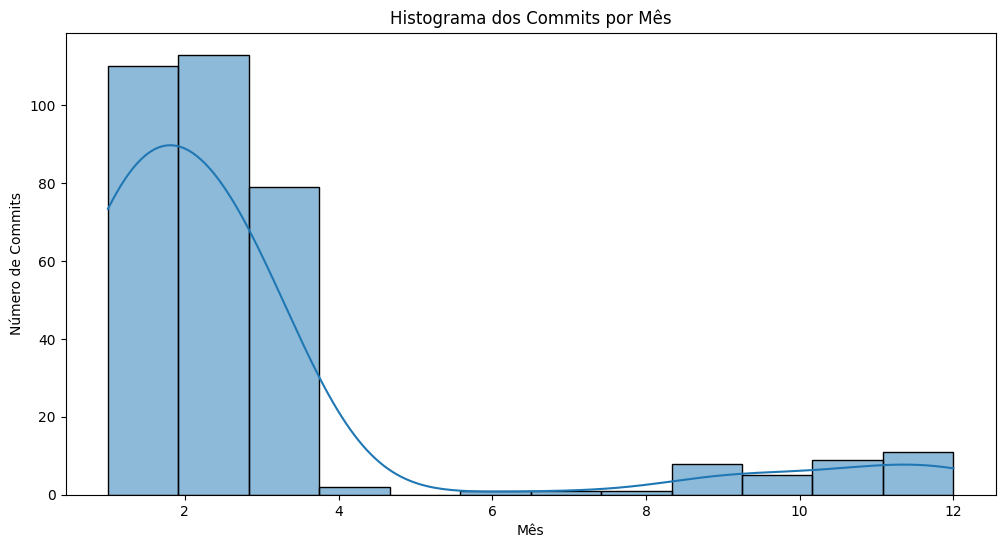

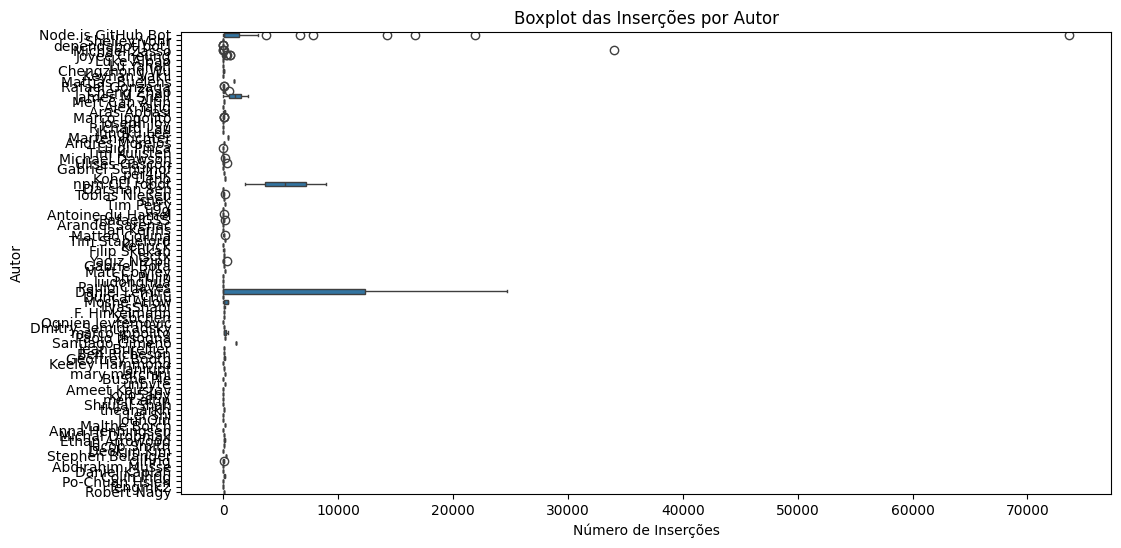

In [7]:
# Histograma dos commits por mês
plt.figure(figsize=(12, 6))
sns.histplot(data['author_month'], bins=12, kde=True)
plt.title('Histograma dos Commits por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Commits')
plt.show()

# Boxplot das inserções por autor
plt.figure(figsize=(12, 6))
sns.boxplot(x='insertions', y='author_name', data=data)
plt.title('Boxplot das Inserções por Autor')
plt.xlabel('Número de Inserções')
plt.ylabel('Autor')
plt.show()

### Análise e Geração de Gráficos
Agora vamos gerar o gráfico agrupando os autores com o mesmo ID de commit.

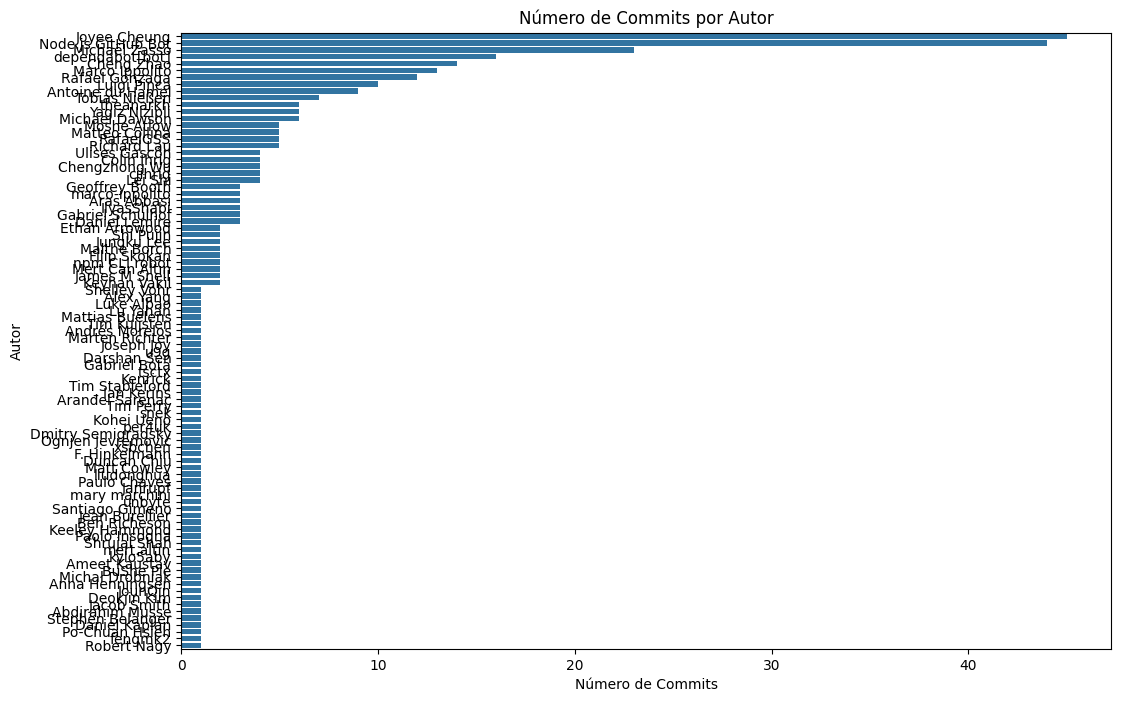

In [8]:
# Contando o número de commits por autor
commits_per_author = data['author_name'].value_counts()

# Transformando em DataFrame para facilitar a manipulação
commits_per_author = commits_per_author.reset_index()
commits_per_author.columns = ['author_name', 'commits']

# Plotando o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='commits', y='author_name', data=commits_per_author)
plt.title('Número de Commits por Autor')
plt.xlabel('Número de Commits')
plt.ylabel('Autor')
plt.show()

### Análise e Geração de Gráficos
Agora vamos gerar o gráfico agrupando os autores com o mesmo ID de commit e dividindo em partes iguais para ficar mais facil a visualização.

c:\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


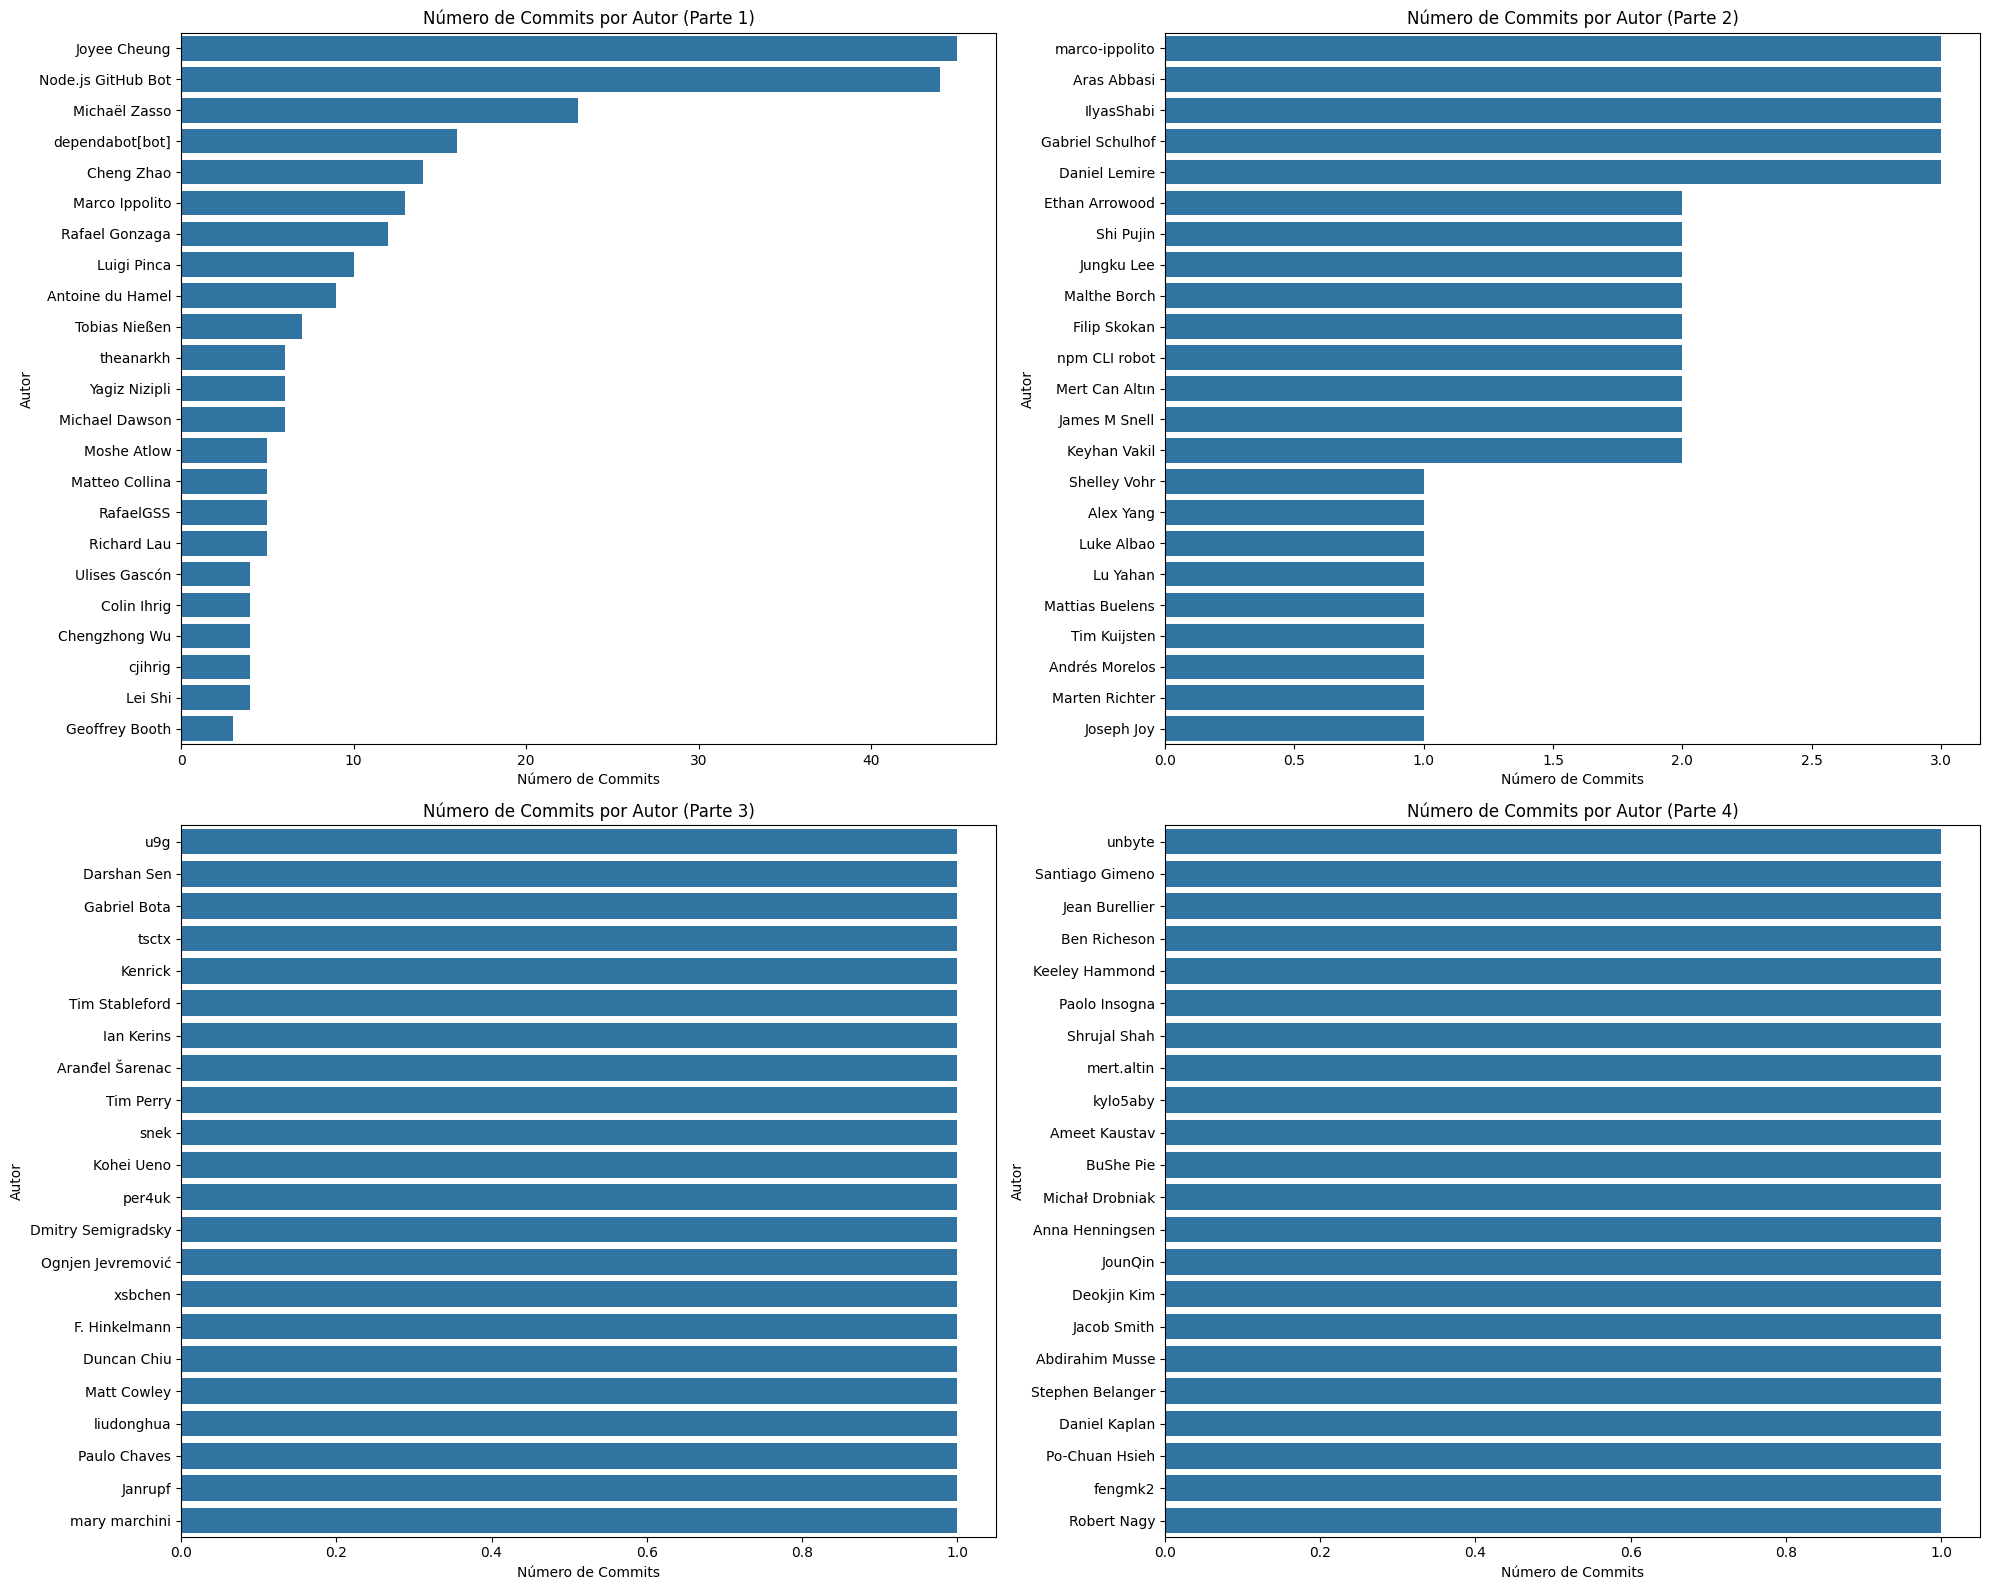

In [9]:
# Dividindo os dados em 4 partes aproximadamente iguais
split_data = np.array_split(commits_per_author, 4)

# Plotando 4 gráficos de barras
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

for i, ax in enumerate(axs.flat):
    sns.barplot(x='commits', y='author_name', data=split_data[i], ax=ax)
    ax.set_title(f'Número de Commits por Autor (Parte {i + 1})')
    ax.set_xlabel('Número de Commits')
    ax.set_ylabel('Autor')

plt.tight_layout()
plt.show()

### Análise e Geração de Gráficos
Agora vamos gerar o gráfico trazendo os 5 autores que mais contribuiram nos commit do projeto.

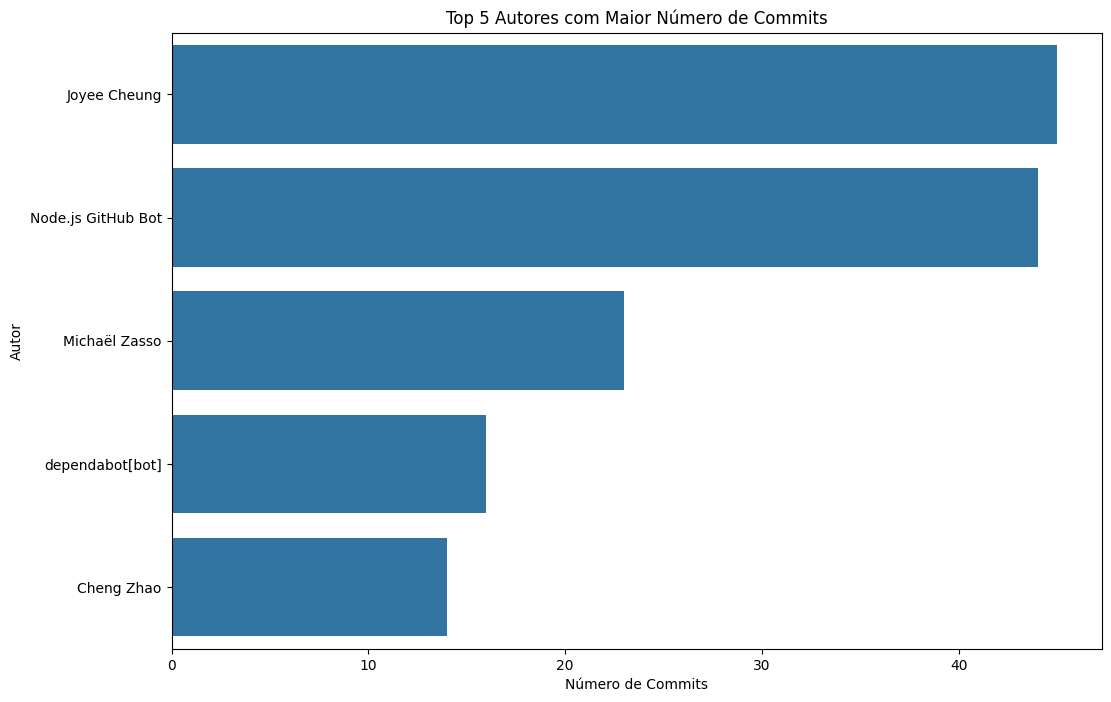

In [10]:
# Filtrando os 5 autores com o maior número de commits
top_5_authors = commits_per_author.head(5)

# Plotando o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='commits', y='author_name', data=top_5_authors)
plt.title('Top 5 Autores com Maior Número de Commits')
plt.xlabel('Número de Commits')
plt.ylabel('Autor')
plt.show()

### Análise e Geração de Gráficos
Agora vamos gerar o gráfico trazendo 5 dias que tiveram mais contribuições no projeto de acordo com a data do filtro (período de busca no início do programa).

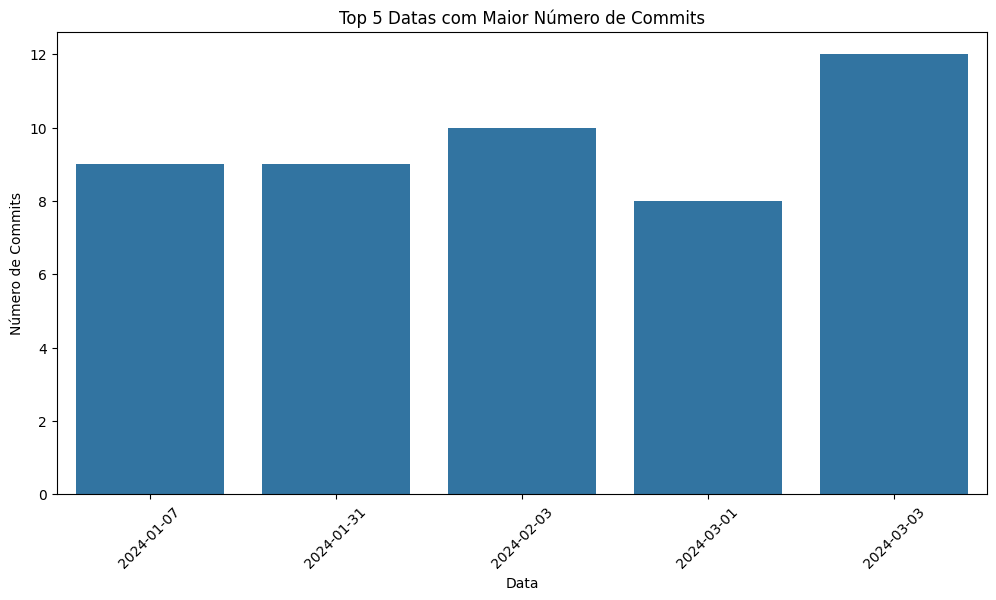

In [13]:
# Agrupando por dia e contando o número de commits
commits_per_day = data['author_date'].dt.date.value_counts().reset_index()
commits_per_day.columns = ['date', 'commits']

# Selecionando as 5 datas com maior número de commits
top_5_days = commits_per_day.nlargest(5, 'commits')

# Ordenando os dados por data
top_5_days = top_5_days.sort_values('date')

# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='date', y='commits', data=top_5_days)
plt.title('Top 5 Datas com Maior Número de Commits')
plt.xlabel('Data')
plt.ylabel('Número de Commits')
plt.xticks(rotation=45)
plt.show()